In [1]:
import numpy as np
import pandas as pd
import pylab as plb

The data set that you need is in one of the sheets of the Excel file Assignment_2_Data_and_Template.xlsx (attached). The other sheets contain shaded cells meant to be filled in by you. Examine the sheets carefully and understand what must be computed or described. Except for cutting and pasting your results in the specific cells provided, do not alter the spreadsheet in any other way. This is the only recognized means of submitting this assignment.

In [2]:
# Import data into Panda.DataFrame
df = pd.read_excel('Assignment_2_Data_and_Template.xlsx')

# Filter out data for Male and Female data
male_data = df.loc[df['Sex'] == 'Male']
female_data = df.loc[df['Sex'] == 'Female']

female_data = female_data.drop('Sex', 1)
female_data = female_data.reset_index(drop=True)
male_data = male_data.drop('Sex', 1)
male_data = male_data.reset_index(drop=True)

In [61]:
import math
bins = math.log(len(female_data) + len(male_data), 2)+1; bins

8.383704292474054

In [62]:
B=9

min1 = min(female_data['Height'].min(), male_data['Height'].min())
max1 = max(female_data['Height'].max(), male_data['Height'].max())

min2 = min(female_data['HandSpan'].min(), male_data['HandSpan'].min())
max2 = max(female_data['HandSpan'].max(), male_data['HandSpan'].max())

Construct separate 2D histograms for male and female heights. You decide on the number of bins to use, making sure there is sufficient resolution and bin-filling. Represent height in rows, and handspan in columns -- both in ascending order of magnitude of feature. Do not use a built-in histogram program. 

In [63]:
# Determine which bin each data point falls

counts_f = np.zeros((B, B))
counts_m = np.zeros((B, B))

for index,rows in female_data.iterrows():
    r= int(np.floor((rows['Height']-min1)/(max1-min1)*B))
    c= int(np.floor((rows['HandSpan']-min2)/(max2-min2)*B))
                    
    if r >= B:
        r = B-1
    elif c >= B:
        c = B-1
        
    counts_f[r][c] += 1
    
for index,rows in male_data.iterrows():
    r= int(np.floor((rows['Height']-min1)/(max1-min1)*B))
    c= int(np.floor((rows['HandSpan']-min2)/(max2-min2)*B))
                    
    if r >= B:
        r = B-1
    if c >= B:
        c = B-1
                
    counts_m[r][c] += 1

In [64]:
counts_f

array([[  1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.],
       [  2.,   1.,   2.,   1.,   1.,   0.,   0.,   0.,   0.],
       [  3.,   0.,   4.,   2.,   2.,   2.,   0.,   0.,   0.],
       [  0.,   2.,  13.,  11.,   7.,   1.,   0.,   0.,   0.],
       [  0.,   1.,   2.,  11.,   8.,   2.,   2.,   0.,   0.],
       [  0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   1.,   1.,   0.,   1.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [65]:
# function to compute histogram results

def histo_result(histogram, query, mins, maxs):
    
    hist_f = histogram[0]
    hist_m = histogram[1]

    ht = query[0]
    hs = query[1]

    ht_min = mins[0]
    hs_min = mins[1]
    
    ht_max = maxs[0]
    hs_max = maxs[1]

    bin_ht = int(np.floor((ht - ht_min) / (ht_max - ht_min) * B))
    bin_hs = int(np.floor((hs - hs_min) / (hs_max - hs_min) * B))

    prob_f = hist_f[bin_ht][bin_hs]/(hist_f[bin_ht][bin_hs] + hist_m[bin_ht][bin_hs])

    if hist_f[bin_ht][bin_hs] + hist_m[bin_ht][bin_hs] == 0:
        return("Indeterminate")
    elif prob_f > 0.5:
        return ("Female", prob_f)
    elif prob_f < 0.5:
        return ("Male", 1-prob_f)
    elif prob_f == 0.5:
        return ("50-50", prob_f)

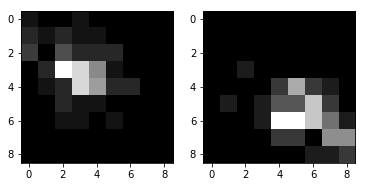

In [66]:
#plot 2D histogram

plb.subplot(1, 2, 1);
plb.imshow(counts_f,interpolation='None',cmap=plb.get_cmap('gray'));
plb.subplot(1, 2, 2);
plb.imshow(counts_m,interpolation='None',cmap=plb.get_cmap('gray'));
plb.show()

Find the parameters of two 2D Gaussian models for the 2 PDFs to describe the data. Let the first dimension represent height, and the second dimension represent handspan. You may use built-in functions to compute these parameters, but do not use a built-in function to compute the pdf. 

In [67]:
# Function to compute pdf for female
def pdf(x_v): 
    # input: x_v = 1x2 matrix with queried (Height, HandSpan)
    # output: probability of being female
    
    mean = female_data.mean()
    total = len(female_data)
    cov = female_data.cov()
    
    sqrt_cov_det = np.sqrt(np.linalg.det(cov))
    diff = np.subtract(x_v, mean)
    cov_inv = np.linalg.inv(cov)
    
    f_result = total / (np.sqrt(2*np.pi)*sqrt_cov_det) * np.exp(-0.5 * diff.dot(cov_inv).dot(diff.T))
    
    mean = male_data.mean()
    total = len(male_data)
    cov = male_data.cov()
    
    sqrt_cov_det = np.sqrt(np.linalg.det(cov))
    diff = np.subtract(x_v, mean)
    cov_inv = np.linalg.inv(cov)
    
    m_result = total / (np.sqrt(2*np.pi)*sqrt_cov_det) * np.exp(-0.5 * diff.dot(cov_inv).dot(diff.T))
    
    return f_result / (m_result + f_result)

Based on the histograms and Gaussian models, compute the likely gender (given as the probability of being female) of individuals with measurements as given below (Height in inches, handspan in centimeters). What are your observations?

Height  Handspan
69       17.5
66       22
70       21.5
69       23.5

In [68]:
#Gaussian results
print(pdf((69,17.5)))
print(pdf((66,22)))
print(pdf((70,21.5)))
print(pdf((69,23.5)))

0.898536255812
0.655579223246
0.198857217832
0.0564517965273


In [71]:
#Histogram results
histogram = (counts_f, counts_m)
queries = [(69,17.5),(66,22), (70,21.5), (69,23.5)]
mins = (min1, min2)
maxs = (max1, max2)

for query in queries:
    print(histo_result(histogram, query, mins, maxs))
    
    
print(counts_f)
print(counts_m)

print (max1, max2)

('Male', 1.0)
('Female', 1.0)
('Male', 1.0)
('Male', 1.0)
[[  1.   0.   0.   1.   0.   0.   0.   0.   0.]
 [  2.   1.   2.   1.   1.   0.   0.   0.   0.]
 [  3.   0.   4.   2.   2.   2.   0.   0.   0.]
 [  0.   2.  13.  11.   7.   1.   0.   0.   0.]
 [  0.   1.   2.  11.   8.   2.   2.   0.   0.]
 [  0.   0.   2.   1.   1.   0.   0.   0.   0.]
 [  0.   0.   1.   1.   0.   1.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  2.  6.  2.  1.  0.]
 [ 0.  1.  0.  1.  3.  3.  7.  2.  0.]
 [ 0.  0.  0.  1.  9.  9.  7.  4.  1.]
 [ 0.  0.  0.  0.  2.  2.  0.  5.  5.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  2.]]
78.0 25.5


Extra credit: Reconstruct a histogram using female model parameters that can be compared to the female histogram constructed in Part 2. Similarly, reconstruct a histogram using male model parameters.

XZCVPR

In [100]:
def one_histo(data, mins, maxs, B=9):
    
    data = pd.DataFrame(data, columns=['Height', 'HandSpan'])

    counts = np.zeros((B, B))

    for index,rows in data.iterrows():
        r = int(np.floor((rows['Height'] - mins[0]) / (maxs[0]-mins[0]) * B))
        c = int(np.floor((rows['HandSpan'] - mins[1]) / (maxs[1]-mins[1]) * B))
        
        if r >= B:
            r = B-1
        if c >= B:
            c = B-1
        counts [r][c] += 1

    return counts

In [101]:
x = female_data.mean()
z = female_data.copy()

for index,rows in z.iterrows():
    z.loc[index] = rows - x
    
c = z.cov()

l, v = np.linalg.eigh(c)
v = np.flipud(v)
v = np.real(v)
    
p = np.dot(z,v.T)

r=np.dot(p,v)
#r is the reduced data

xrec_f = r.copy()

for i in range(len(xrec_f)):
    xrec_f[i] = xrec_f[i] + x
    
#### same calcs for male data
    
x_m = male_data.mean()
z_m = male_data.copy()

for index,rows in z_m.iterrows():
    z_m.loc[index] = rows - x_m
    
c_m = z_m.cov()

l, v_m = np.linalg.eigh(c_m)
v_m = np.flipud(v_m)
v_m = np.real(v_m)
    
p_m = np.dot(z_m,v_m.T)

r_m=np.dot(p_m,v_m)
#r is the reduced data

xrec_m = r_m.copy()

for i in range(len(xrec_m)):
    xrec_m[i] = xrec_m[i] + x_m
    
print(xrec_m-male_data)

    Height  HandSpan
0      0.0       0.0
1      0.0       0.0
2      0.0       0.0
3      0.0       0.0
4      0.0       0.0
5      0.0       0.0
6      0.0       0.0
7      0.0       0.0
8      0.0       0.0
9      0.0       0.0
10     0.0       0.0
11     0.0       0.0
12     0.0       0.0
13     0.0       0.0
14     0.0       0.0
15     0.0       0.0
16     0.0       0.0
17     0.0       0.0
18     0.0       0.0
19     0.0       0.0
20     0.0       0.0
21     0.0       0.0
22     0.0       0.0
23     0.0       0.0
24     0.0       0.0
25     0.0       0.0
26     0.0       0.0
27     0.0       0.0
28     0.0       0.0
29     0.0       0.0
..     ...       ...
48     0.0       0.0
49     0.0       0.0
50     0.0       0.0
51     0.0       0.0
52     0.0       0.0
53     0.0       0.0
54     0.0       0.0
55     0.0       0.0
56     0.0       0.0
57     0.0       0.0
58     0.0       0.0
59     0.0       0.0
60     0.0       0.0
61     0.0       0.0
62     0.0       0.0
63     0.0   

In [103]:
rec_f = one_histo(xrec_f, mins, maxs)
rec_m = one_histo(xrec_m, mins, maxs)

#check that reconstructed f is the same as f
#check that reconstructed m is the same as m

print(rec_f - counts_f)
print('\n')
print(rec_m - counts_m)

#output results to excel file

# writeExcelData(x,excelfile,sheetname,startrow,startcol)


[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]]


[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [106]:
import ReadWriteExcel as rw

rw.writeExcelData(pd.DataFrame(rec_f), "Assignment_2_Data_and_Template.xlsx", "Reconstructed Female Histogram", 7, 2)
rw.writeExcelData(pd.DataFrame(rec_m), "Assignment_2_Data_and_Template.xlsx", "Reconstructed Male Histogram", 7, 2)

In [ ]:
#determine histogram for reduced data
r_bins = 22
c_bins = 11

# Determine bin widths based on maximum of each data set
f_r_bw = np.ceil((r_f['Height'].max() - r_f['Height'].min()) / r_bins)
f_c_bw = np.ceil((r_f['HandSpan'].max() - r_f['HandSpan'].min()) / c_bins)

m_r_bw = np.ceil((r_m['Height'].max() - r_m['Height'].min()) / r_bins)
m_c_bw = np.ceil((r_m['HandSpan'].max() - r_m['HandSpan'].min()) / c_bins)

# Determine which bin each data point falls

r_f['Height'] = np.floor(r_f['Height'] / f_r_bw)
r_f['HandSpan'] = np.floor(r_f['HandSpan'] / f_c_bw)

r_m['Height'] = np.floor(r_m['Height'] / m_r_bw)
r_m['HandSpan'] = np.floor(r_m['HandSpan'] / m_c_bw)

# Determine how many data points fall within each bin

counts_f = np.zeros((r_bins, c_bins))
counts_m = np.zeros((r_bins, c_bins))

min_r_bin = np.floor(r_f['Height'].min())
min_c_bin = np.floor(r_f['HandSpan'].min())

for index,rows in r_f.iterrows():
    counts_f[rows['Height']-min_r_bin][rows['HandSpan']-min_c_bin] += 1
    
for index,rows in r_m.iterrows():
    if index != 71:
        counts_m[rows['Height']- min_r_bin][rows['HandSpan']-min_c_bin] += 1
    else:
        print(index)
        print(rows)

In [ ]:
#plot 2D histogram

plb.subplot(1, 2, 1);
plb.imshow(counts_f,interpolation='None',cmap=plb.get_cmap('gray'));
plb.subplot(1, 2, 2);
plb.imshow(counts_m,interpolation='None',cmap=plb.get_cmap('gray'));
plb.show()